# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [1]:
import numpy as np
import pandas as pd
import ipywidgets as widgets
import matplotlib.pyplot as plt


# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject
import HouseholdSpecializationModel

# Question 1

**Explain how you solve the model**

In [2]:
# code for solving the model (remember documentation and comments)
model = HouseholdSpecializationModel.HouseholdSpecializationModelClass()
HM = np.zeros([3,3]) # empty matrix to be filled

alphalist = [0.25, 0.50, 0.75] #starting alpha values
sigmalist = [0.5, 1.0, 1.5] # starting sigma values

# iterate over alphalist and then sigma list and call solution
for i, j in enumerate(alphalist): 
    model.par.alpha = j
    for it, s in enumerate(sigmalist):
        model.par.sigma = s
        out =  model.solve_discrete()
        HM[i,it] = out.HF /out.HM



c:\IntroProgNum\projects-2023-hold-11\inauguralproject\HouseholdSpecializationModel.py:64: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))


In [3]:
print(HM)

[[0.54545455 0.30769231 0.21428571]
 [1.         1.         1.        ]
 [1.83333333 3.25       4.66666667]]


In [4]:
#Force reset of parameters to standard
model.alpha = 0.5
model.sigma=1

# Question 2

In [5]:
model = HouseholdSpecializationModel.HouseholdSpecializationModelClass()
model.solve_wF_vec(discrete=True)

[ 0.22314355  0.          0.         -0.11778304 -0.22314355]
[-0.22314355 -0.10536052  0.          0.09531018  0.18232156]


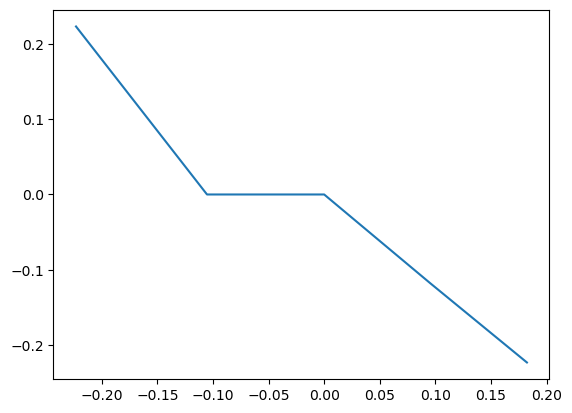

In [6]:
# plot the log ratio of hours worked for female and male and the log ratio of wage for female and male
y = np.log(model.sol.HF_vec/model.sol.HM_vec) # call the solution and make fraction of hours and take log
print(y)
x = np.log(model.par.wF_vec) #call the parameters from the class 
print(x)
plt.plot(x,y)

Explain your code and procedure

# Question 3

Explain your code and procedure

In [7]:
# code

ADD CONCISE CONLUSION.

In [8]:
#Question 4
